# Feature Engineering - Processing Time

We add additional columns to add the days elapsed from filing to registration. Other features were added but ultimately not used.

In [1]:
# Import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import mean

In [2]:
df_pt = pd.read_csv("data/patents_timeline_cleaned.csv")
df_um = pd.read_csv("data/ums_timeline_cleaned.csv")

In [3]:
df_pt['Status'].value_counts()

Expired       22091
Inactive      14055
Published      5471
Registered     3065
Name: Status, dtype: int64

In [4]:
# Inactive patents are expired patents
df_pt.loc[(df_pt['Status'].eq('Inactive')) & df_pt['Registration Date'].notna()]

,Original Filing Number,Title,Application Subtype,Applicant,Filing Date,Publication Date,Registration Date,Status,Number of Unique IPC Classes,Number of Unique Main Categories,Number of Unique Sub Categories 1,Number of Unique Sub Categories 2,Expiration Date,Days_FD_PD,Days_PD_RD,Days_ED_RD,Days_FD_RD
4,A/1/1994/049647,HERBICIDAL COMPOSITIONS COMPRISING GLYPHOSATE ...,Invention,"KASSEBAUM, JAMES WEB\nBERK, HOWARD CARY",1994-12-22,NaN,1999-11-12,Inactive,6,1,1,1,2014-12-22,NaN,NaN,5519.0,1786.0
6,A/1/1995/049921,MEANS FOR CLOSING THE SEAM OF A ROLLED DOUGH BODY,Invention,TORAHIKO HAYASHI,1995-02-08,NaN,1999-11-17,Inactive,6,1,1,1,2015-02-08,NaN,NaN,5562.0,1743.0
7,A/1/1995/050163,DEODORIZING COMPOSITION CONTAINING FERROUS COM...,Invention,CHIAKI OHAMA,1995-03-21,NaN,2001-02-01,Inactive,1,1,1,1,2015-03-21,NaN,NaN,5161.0,2144.0
14,B/1/1995/050279,16-SUBSTITUTED-4-AZA-ANDROSTANE-5-ALPHA-REDUCT...,Invention,PHILIPPE L. DURETTE\nGARY H. RASMUSSON\nWILLIA...,1995-04-10,NaN,2001-04-04,Inactive,2,2,2,2,2015-04-10,NaN,NaN,5119.0,2186.0
13217,PH/1/0/021139,EPIMERIZATION OF MALONIC ACID ESTERS,Invention,FUMIHIKO WATANABE\nMITSUAKI OHTANI\nMASAYUKI N...,1983-06-30,NaN,1997-07-27,Inactive,8,1,1,3,2003-06-30,NaN,NaN,2164.0,5141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42701,PH/1/2000/001445,GUM HEALTH GUIDE,Invention,UNILEVER N. V.,2000-06-01,2002-08-05,2006-05-05,Inactive,4,1,1,2,2020-06-01,795.0,1369.0,5141.0,2164.0
42703,PH/1/2000/001447,BABY BOTTLE,Invention,"TANTIROONGROJCHAI, ANUPONGSE",2000-06-01,2002-08-05,2006-06-16,Inactive,1,1,1,1,2020-06-01,795.0,1411.0,5099.0,2206.0
42705,PH/1/2000/001449,INDOLYLPIPERIDINE DERIVATIVES AS ANTIHISTAMINI...,Invention,ALMIRALL PRODESFARMA S.A.,2000-06-02,2002-07-01,2005-12-02,Inactive,11,2,2,3,2020-06-02,759.0,1250.0,5296.0,2009.0
42708,PH/1/2000/001453,"RARE EARTH BONDED MAGNET, RARE EARTH BONDED MA...",Invention,KOJI AKIOKA\nYOSHIKI NAKAMURA,2000-06-02,2002-08-05,2005-01-07,Inactive,8,2,2,3,2020-06-02,794.0,886.0,5625.0,1680.0


In [5]:
df_pt.loc[(df_pt['Status'].eq('Inactive')) & df_pt['Registration Date'].isna()]

,Original Filing Number,Title,Application Subtype,Applicant,Filing Date,Publication Date,Registration Date,Status,Number of Unique IPC Classes,Number of Unique Main Categories,Number of Unique Sub Categories 1,Number of Unique Sub Categories 2,Expiration Date,Days_FD_PD,Days_PD_RD,Days_ED_RD,Days_FD_RD
26836,PH/1/1998/000002,ABSORBENT INTERLABIAL DEVICE WITH FLEXIBLE EXT...,Invention,MISSING OWNER,1998-01-02,1999-12-14,NaN,Inactive,1,1,1,1,2018-01-02,711.0,NaN,NaN,NaN
26839,PH/1/1998/000005,CANTILEVERED BALL CONNECTION FOR INTEGRATED CI...,Invention,MISSING OWNER,1998-01-02,1999-12-14,NaN,Inactive,1,1,1,1,2018-01-02,711.0,NaN,NaN,NaN
26842,PH/1/1998/000009,INDICATING MECHANISM,Invention,"BRIBEX LIMITED,",1998-01-05,1999-12-14,NaN,Inactive,2,1,1,1,2018-01-05,708.0,NaN,NaN,NaN
26845,PH/1/1998/000012,SIMPLE MOULDING PROCESS AND TRANS-PORTABLE APP...,Invention,MISSING OWNER,1998-01-06,1999-12-14,NaN,Inactive,1,1,1,1,2018-01-06,707.0,NaN,NaN,NaN
26846,PH/1/1998/000013,DETERMINATION OF SERVICE SITUATION IN PACKET R...,Invention,"NOKIA TELECOMMUNICATIONS OY,",1998-01-06,1999-12-14,NaN,Inactive,1,1,1,1,2018-01-06,707.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44641,PH/1/2017/000051,KELVIN CONTACT ASSEMBLY AND METHOD OF INSTALLA...,Invention,JF MICROTECHNOLOGY SDN. BHD.,2017-02-21,2018-08-06,NaN,Inactive,5,2,2,3,2037-02-21,531.0,NaN,NaN,NaN
44648,PH/1/2017/000058,OBSTRUCTION CLEARING ASSEMBLY,Invention,"ROSAL, Aries M.",2017-03-02,2018-09-17,NaN,Inactive,5,2,2,2,2037-03-02,564.0,NaN,NaN,NaN
44660,PH/1/2017/000027,BACK ABSORBENT TOWEL,Invention,"CATALUNA, MICHAEL CORTES",2017-01-30,2018-08-06,NaN,Inactive,2,1,1,2,2037-01-30,553.0,NaN,NaN,NaN
44662,PH/1/2017/000029,INNO BANK,Invention,"SEVILLA, Bhert Sant D.",2017-01-31,2018-08-06,NaN,Inactive,2,2,2,2,2037-01-31,552.0,NaN,NaN,NaN


In [6]:
df_um['Status'].value_counts()

Expired       11934
Published      4740
Registered      488
Name: Status, dtype: int64

In [7]:
df_pt['Status'].value_counts()

Expired       22091
Inactive      14055
Published      5471
Registered     3065
Name: Status, dtype: int64

In [8]:
df_pt['Status'].replace({'Inactive':'Expired'}, inplace=True)

In [9]:
df_pt.loc[(df_pt['Status'].eq('Expired')) & df_pt['Registration Date'].notna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31286 entries, 0 to 43592
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Original Filing Number             31286 non-null  object 
 1   Title                              31286 non-null  object 
 2   Application Subtype                31286 non-null  object 
 3   Applicant                          31286 non-null  object 
 4   Filing Date                        31286 non-null  object 
 5   Publication Date                   4608 non-null   object 
 6   Registration Date                  31286 non-null  object 
 7   Status                             31286 non-null  object 
 8   Number of Unique IPC Classes       31286 non-null  int64  
 9   Number of Unique Main Categories   31286 non-null  int64  
 10  Number of Unique Sub Categories 1  31286 non-null  int64  
 11  Number of Unique Sub Categories 2  31286 non-null  int

In [10]:
df_pt.loc[(df_pt['Status'].eq('Expired')) & df_pt['Registration Date'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4860 entries, 26836 to 44676
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Original Filing Number             4860 non-null   object 
 1   Title                              4860 non-null   object 
 2   Application Subtype                4860 non-null   object 
 3   Applicant                          4860 non-null   object 
 4   Filing Date                        4860 non-null   object 
 5   Publication Date                   4860 non-null   object 
 6   Registration Date                  0 non-null      object 
 7   Status                             4860 non-null   object 
 8   Number of Unique IPC Classes       4860 non-null   int64  
 9   Number of Unique Main Categories   4860 non-null   int64  
 10  Number of Unique Sub Categories 1  4860 non-null   int64  
 11  Number of Unique Sub Categories 2  4860 non-null   

In [11]:
df_pt.loc[(df_pt['Status'].eq('Published')) & df_pt['Publication Date'].isna()].head()

,Original Filing Number,Title,Application Subtype,Applicant,Filing Date,Publication Date,Registration Date,Status,Number of Unique IPC Classes,Number of Unique Main Categories,Number of Unique Sub Categories 1,Number of Unique Sub Categories 2,Expiration Date,Days_FD_PD,Days_PD_RD,Days_ED_RD,Days_FD_RD
24382,PH/1/1995/051965,A COMPOSITE INTERLOCKING CHANNEL,Invention,ABETO A. UY,1995-12-20,NaN,2005-11-08,Published,1,1,1,1,2015-12-20,NaN,NaN,3694.0,3611.0
24770,PH/1/1996/053231,REINFORCED CEMENT BOARD,Invention,"ONG, RUBEN",1996-05-31,NaN,2005-02-18,Published,1,1,1,1,2016-05-31,NaN,NaN,4120.0,3185.0
24952,PH/1/1996/053823,NEW PHARMACEUTICAL COMPOSITION AND THE USE THE...,Invention,DR. ROLF BANHOLZER\nDR. BERND DISSE\nGEORG SPE...,1996-07-31,NaN,2003-08-05,Published,6,2,2,3,2016-07-31,NaN,NaN,4744.0,2561.0
25489,PH/1/1997/055349,ULTA-LOW MOLECULAR WEIGHT ETHYLENE POLYMERS,Invention,"GARRISON, CRAIG C.\nGUERRA, RALPH E.\nGUEST, M...",1997-01-21,NaN,2004-09-24,Published,10,1,1,1,2017-01-21,NaN,NaN,4502.0,2803.0
26523,PH/1/1997/058174,"BALL-ARRANGING SUBSTRATE FOR FORMING BUMPS, BA...",Invention,EIJI HASHINO\nKENJI SHIMOKAWA\nKOHEI TATSUMI,1997-10-13,NaN,2006-09-22,Published,5,1,2,2,2017-10-13,NaN,NaN,4039.0,3266.0


In [12]:
# drop patents published without any publication date
df_pt.drop(df_pt[(df_pt['Status'].eq('Published')) & (df_pt['Publication Date'].isna())].index , inplace=True)

In [13]:
# drop um published without any publication date
df_um.drop(df_um[(df_um['Status'].eq('Published')) & (df_um['Publication Date'].isna())].index , inplace=True)

In [14]:
df_pt['Filing Date'] = pd.to_datetime(df_pt['Filing Date']).dt.date
df_pt['Publication Date'] = pd.to_datetime(df_pt['Publication Date']).dt.date
df_pt['Registration Date'] = pd.to_datetime(df_pt['Registration Date']).dt.date
df_pt['Expiration Date'] = pd.to_datetime(df_pt['Expiration Date']).dt.date

In [15]:
df_um['Filing Date'] = pd.to_datetime(df_um['Filing Date']).dt.date
df_um['Publication Date'] = pd.to_datetime(df_um['Publication Date']).dt.date
df_um['Registration Date'] = pd.to_datetime(df_um['Registration Date']).dt.date
df_um['Expiration Date'] = pd.to_datetime(df_um['Expiration Date']).dt.date

In [16]:
df_pt['Days_FD_PD'] = (df_pt['Publication Date'] - df_pt['Filing Date']).dt.days
df_um['Days_FD_PD'] = (df_um['Publication Date'] - df_um['Filing Date']).dt.days
df_pt['Days_PD_RD'] = (df_pt['Registration Date'] - df_pt['Publication Date']).dt.days
df_um['Days_PD_RD'] = (df_um['Registration Date'] - df_um['Publication Date']).dt.days
df_pt['Days_ED_RD'] = (df_pt['Expiration Date'] - df_pt['Registration Date']).dt.days
df_um['Days_ED_RD'] = (df_um['Expiration Date'] - df_um['Registration Date']).dt.days
df_pt['Days_FD_RD'] = (df_pt['Registration Date'] - df_pt['Filing Date']).dt.days
df_um['Days_FD_RD'] = (df_um['Registration Date'] - df_um['Filing Date']).dt.days

In [17]:
df_pt.columns

Index(['Original Filing Number', 'Title', 'Application Subtype', 'Applicant',
       'Filing Date', 'Publication Date', 'Registration Date', 'Status',
       'Number of Unique IPC Classes', 'Number of Unique Main Categories',
       'Number of Unique Sub Categories 1',
       'Number of Unique Sub Categories 2', 'Expiration Date', 'Days_FD_PD',
       'Days_PD_RD', 'Days_ED_RD', 'Days_FD_RD'],
      dtype='object')

In [18]:
df_pt = df_pt[['Original Filing Number', 'Title', 'Application Subtype', 'Applicant','Filing Date', 'Publication Date', 'Registration Date', 'Expiration Date', 'Status', 'Number of Unique IPC Classes', 'Number of Unique Main Categories', 'Number of Unique Sub Categories 1','Number of Unique Sub Categories 2', 'Days_FD_PD','Days_PD_RD', 'Days_ED_RD', 'Days_FD_RD']]

In [19]:
df_um = df_um[['Original Filing Number', 'Title', 'Application Subtype', 'Applicant','Filing Date', 'Publication Date', 'Registration Date', 'Expiration Date', 'Status', 'Number of Unique IPC Classes', 'Number of Unique Main Categories', 'Number of Unique Sub Categories 1','Number of Unique Sub Categories 2', 'Days_FD_PD','Days_PD_RD', 'Days_ED_RD', 'Days_FD_RD']]

In [20]:
df = pd.concat([df_pt,df_um])
df.head()

,Original Filing Number,Title,Application Subtype,Applicant,Filing Date,Publication Date,Registration Date,Expiration Date,Status,Number of Unique IPC Classes,Number of Unique Main Categories,Number of Unique Sub Categories 1,Number of Unique Sub Categories 2,Days_FD_PD,Days_PD_RD,Days_ED_RD,Days_FD_RD
0,A/1/1993/046127,PRESS-ON CLOSURE WITH PEELABLE END PANEL,Invention,"SAUER, DONALD G.\nFRASER, ROBERT W.\nROTH, DON...",1993-04-29,NaT,2002-12-17,2013-04-29,Expired,3,1,1,1,NaN,NaN,3786.0,3519.0
1,A/1/1993/046622,"IMIDAZOLE, TRIAZOLE AND TETRAZOLE DERIVATIVES",Invention,"MATASSA, VICTOR G.\nBAKER, RAYMOND\nSTREET, LE...",1993-07-30,NaT,2004-03-15,2013-07-30,Registered,30,2,2,3,NaN,NaN,3424.0,3881.0
2,A/1/1993/047573,PREFILLED SYRINGE,Invention,"TAKEDA CHEMICAL INDUSTRIES, LTD.",1993-04-19,NaT,2003-03-11,2013-04-19,Expired,1,1,1,1,NaN,NaN,3692.0,3613.0
3,A/1/1994/049461,RECORDING MEDIUM MANAGEMENT METHOD WHERE RECOR...,Invention,KATSUYUKI TERANISHI\nTATSUYA IGARASHI,1994-11-28,NaT,2003-09-10,2014-11-28,Registered,5,1,2,2,NaN,NaN,4097.0,3208.0
4,A/1/1994/049647,HERBICIDAL COMPOSITIONS COMPRISING GLYPHOSATE ...,Invention,"KASSEBAUM, JAMES WEB\nBERK, HOWARD CARY",1994-12-22,NaT,1999-11-12,2014-12-22,Expired,6,1,1,1,NaN,NaN,5519.0,1786.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A5F334148>]],
      dtype=object)

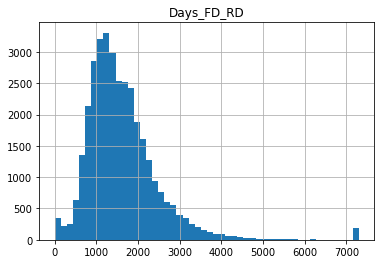

In [21]:
ave_days_pt = df.loc[(df['Application Subtype'].eq('Invention'))]['Days_FD_RD']
ave_days_pt = pd.DataFrame(ave_days_pt)
ave_days_pt.hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A5E986FC8>]],
      dtype=object)

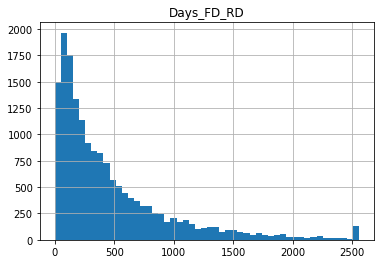

In [22]:
ave_days_um = df.loc[(df['Application Subtype'].eq('Utility model'))]['Days_FD_RD']
ave_days_um = pd.DataFrame(ave_days_um)
ave_days_um.hist(bins=50)